<a href="https://colab.research.google.com/github/LevWilliams/DigitClassifier/blob/master/DigitIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [2]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#!ls ~/.kaggle
#!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 89.4MB/s]
 55% 5.00M/9.16M [00:00<00:00, 36.5MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.4MB/s]
 82% 5.00M/6.09M [00:00<00:00, 37.8MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.9MB/s]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import keras

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [7]:
# Load the data
train = pd.read_csv("train.csv.zip")
test = pd.read_csv("test.csv.zip")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

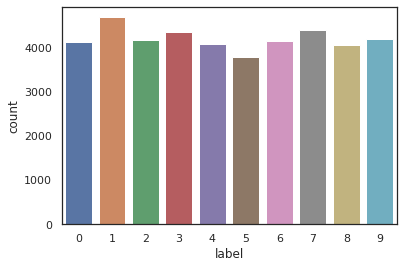

In [8]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [9]:
X_train = X_train / 255.0
test = test / 255.0

Reshaping vects into matricies (images)

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

May need one-hot-encoding. if necessary, add it here.

In [25]:


# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)



In [26]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

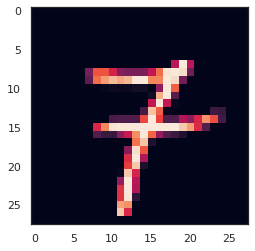

In [27]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [28]:
def create_model():
  model_input = tf.keras.layers.Input(shape = (28,28,1), name = 'img')
  Conv1 = tf.keras.layers.Conv2D(100, 3, activation="relu",padding = 'Same')(model_input)
  Pool1  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(Conv1)
  Pool1 = tf.keras.layers.Dropout(0.5)(Pool1)
  Conv2 = tf.keras.layers.Conv2D(100, 3,padding = 'Same', activation="relu")(Pool1)
  Pool2  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(Conv2)
  Pool2 = tf.keras.layers.Dropout(0.5)(Pool2)
  Flat = tf.keras.layers.Flatten()(Pool2)
  Dense1 = tf.keras.layers.Dense(units= 100, activation="relu")(Flat)
  Dense1 = tf.keras.layers.Dropout(0.5)(Dense1)
  Dense2 = tf.keras.layers.Dense(units= 100, activation="relu")(Dense1)
  Dense2 = tf.keras.layers.Dropout(0.5)(Dense2)
  Output = tf.keras.layers.Dense(units= 10, activation="softmax")(Dense2)

  model = tf.keras.Model(inputs = model_input,outputs = Output)
  model.build(input_shape = (28,28,1))

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="acc")])
  
  model.summary()

  return model

In [29]:
model = create_model()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 100)       1000      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 100)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 100)       90100     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 100)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 100)        

In [30]:


# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



In [31]:


epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86



In [37]:


# Without data augmentation
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,validation_data = (X_val, Y_val))



Epoch 1/30


TypeError: ignored